# Android 어플리케이션 2 - 플라스크

## 3) WebView
- URL을 출력해주는 위젯으로 외부 URL을 출력하려면 INTERNET 권한이 필요
- WebView를 생성하고 loadUrl 메소드에 URL을 문자열로 대입하면 크롬 브라우저를 이용해서 URL을 출력. 
  - Forwarding 되는 URL은 WebView가 하고,
  - Redirect 되는 URL은 내장 브라우저를 통해서 출력되도록 설정되어 있음.
  - 이 경우에는 WebViewClient 객체를 setWebViewClient에 설정하면 웹 뷰에 Redirect되는 URL을 WebViewClient 객체가 처리해서 WebView에 출력함

<br />

특징
- 네트워크 입출력, 캐싱, 링크 클릭 처리, 확대, 축소, 히스토리 관리 등 웹 브라우저가 제공하는 모든 기능을 자체적으로 제공
- 안드로이드에 내장된 웹킷(WebKit) 라이브러리가 처리하므로 원하는 곳에 배치한 후
주소를 넘겨주면 동작함
  - 웹킷은 오픈 소스이며 사파리, 크롬 등에 채용되어 성능이 입증됨
- 인터넷 엑세스를 위해 권한이 필요함
  - 요금 문제와 관련되므로 반드시 사용자의 허가나 동의가 필요함
- 웹을 사용하는 프로그램은 ```AndroidManifest.xml```에 INTERNET permission을 반드시 지정해야 함
      <uses-permission android:name="android.permission.INTERNET" />
- 웹뷰를 사용하여 간단한 웹 브라우저를 만들 수 있으며 액티비티의 일부에 웹 페이지
표시 가능

- 웹 뷰의 설정 변경
  - ```getSetting```메소드로 ```WebSettings``` 객체를 얻은 후 이 객체의 ```set*``` 메소드로 캐시 정책, 폰트 크기, 확대 여부, 스크립트 허용 여부 등의 설정 변경 가능
  - 디폴트가 무난하나 몇 가지 설정은 꼭 변경해야 함
  - ```JavaScript```는 필수
  - 내장 확대 기능을 사용할 경우 아래쪽에 확대, 축소 버튼이 나타나 사용자가 직접
배율 조절 가능하여 편리함
  - 히스토리의 앞, 뒤 이동 기능 제공 메소드
  - 웹 뷰는 로컬의 ```HTML``` 파일도 표시 가능
        void goBack ()   
        void goForward ()  
        boolean canGoBack () 
        boolean canGoForward()  

In [ ]:
# Or you can do it also on the terminal:
pip install flask

In [ ]:
# On PyCharm
# main.py - flask server

from flask import Flask, request
from flask import render_template

# Create an app
app = Flask(__name__)

# A function to send and receive request
# static directory index.html
@app.route('/')
def index():
    # load and display an HTML template
    return render_template('index.html')

# Run a server to access it using your own IP.
app.run(host='0.0.0.0', debug=True)

```templates``` 디렉토리를 만들고 ```index.html``` 파일을 생성하고 작성

In [ ]:
<!DOCTYPE html>
  <html lang="ko">
  <head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
  </head>

  <body>
    <h1>Hi there. This is a test server</h1>
  </body>
</html>

프로젝트 실행, IP와 PORT 번호 확인

In [ ]:
 * Serving Flask app 'main' (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: on
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 000-000-000
 * Running on all addresses.
   WARNING: This is a development server. Do not use it in a production deployment.
 * Running on http://000.00.0.00:8000/ (Press CTRL+C to quit)

IP 주소로 가보면 ```HTML``` 페이지가 실행중.

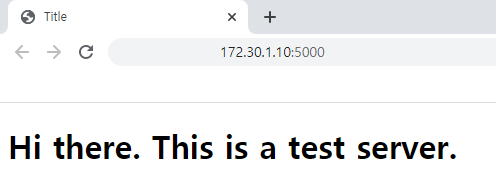

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

flask_server = "/content/flask_server.png"
img = cv2.imread(flask_server)
cv2_imshow(img)

## 4) 안드로이드 프로젝트에 Flask 웹사이트 연동

- 안드로이드 프로젝트 생성 – PythonApplication
- ```AndroidManifest.xml```에 추가  
        <uses-permission android:name="android.permission.INTERNET" />
- 접속하려는 사이트가 https 가 아니면 아래 코드를 ```AndroidManifest.xml``` 파일의 ```application``` 태그에 추가
        android:usesCleartextTraffic="true"

```MainActivity``` 파일에 화면 구성 요소를 가리킬 변수를 선언     

        WebView webView;
        EditText addr;  
        Button btngo, btnback,btnforward,btnlocal;  
      

In [ ]:
package com.example.pythonproj;

import androidx.appcompat.app.AppCompatActivity;

import android.os.Bundle;
import android.os.Handler;
import android.os.Looper;
import android.os.Message;
import android.view.View;
import android.webkit.WebView;
import android.widget.Button;
import android.widget.TextView;

public class WebActivity extends AppCompatActivity {

    @Override
    protected void onCreate(Bundle savedInstanceState){
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_web);

        WebView webview = (WebView)findViewById(R.id.webview);
        webview.loadUrl("http://000.00.0.00:0000");
    }
}

**```activity_web.xml```**에서 디자인 변경

In [ ]:
<?xml version="1.0" encoding="utf-8"?>
<LinearLayout xmlns:android="http://schemas.android.com/apk/res/android"
    xmlns:app="http://schemas.android.com/apk/res-auto"
    xmlns:tools="http://schemas.android.com/tools"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    tools:context=".MainActivity">

    <WebView
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:id="@+id/webview" />
</LinearLayout>

```WebView```로 ```url``` 출력

In [ ]:
public class WebActivity extends AppCompatActivity {

    @Override
    protected void onCreate(Bundle savedInstanceState){
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_web);

        WebView webview = (WebView)findViewById(R.id.webview);
        webview.loadUrl("http://000.00.0.00:0000");
    }
}

인터넷 권한 설정
```<uses-permission android:name="android.permission.INTERNET"/>```

In [ ]:
<?xml version="1.0" encoding="utf-8"?>
<manifest xmlns:android="http://schemas.android.com/apk/res/android"
    package="com.example.pythonproj">

    <!-- 인터넷 권한 설정 -->
    <uses-permission android:name="android.permission.INTERNET"/>
    <application
        android:allowBackup="true"
        android:icon="@mipmap/ic_launcher"
        android:label="@string/app_name"

```AndroidMnifest.xml```파일에 ```<application>``` 태그 추가

- 보안이 취약한(https가 아닌) 웹사이트에 대한 접근 허용

In [ ]:
  <application
      android:usesCleartextTraffic="true"

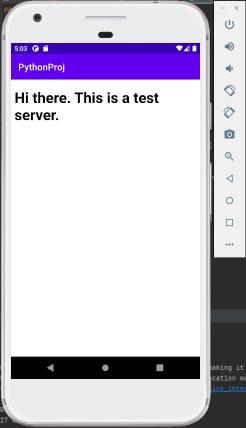

In [ ]:
flask_server = cv2.imread("/content/flask_server_on_Android.png")
flask_server = cv2.resize(flask_server, dsize=(0,0), fx=0.5, fy=0.5)
cv2_imshow(flask_server)

## WebView 옵션 설정
- 옵션 설정은 getSettings()를 호출해서 리턴하는 객체에 설정
- WebView 의 설정 메소드
  - ```setJavaScriptEnabled(true);```  javascript를 실행할 수 있도록 설정
  - ```setJavaScriptCanOpenWindowsAutomatically (true);``` javascript가 ``` window.open()``` 을 사용할 수 있도록 설정
  - ```setBuiltInZoomControls(false);``` 안드로이드에서 제공하는 줌 아이콘을 사용할 수 있도록 설정
  - ```setSupportZoom(false);``` 확대,축소 기능을 사용할 수 있도록 설정
  - ```setPluginState(WebSettings.PluginState.ON_DEMAND);```  플러그인을 사용할 수 있도록 설정
  - ```setSupportMultipleWindows(false);``` 여러 개의 윈도우를 사용할 수 있도록 설정
  - ```setBlockNetworkImage(false);```  네트워크의 이미지의 리소스를 로드하지 않음
  - ```setLoadsImagesAutomatically(true);``` 웹뷰가 앱에 등록되어 있는 이미지 리소스를 자동으
로 로드하도록 설정
  - ```setUseWideViewPort(true);``` wide viewport를 사용하도록 설정
  - ```setCacheMode(WebSettings.LOAD_NO_CACHE);``` 웹뷰가 캐시를 사용하지 않도록 설정
- ``` WebView```  의 ``` addJavaScriptInterface```  메소드를 이용하여 사용할 ``` AndroidJavaScriptInterface``` 를 등
록하고 별도의 이름을 등록하면 이름을 이용해서 웹 페이지에서 안드로이드 네이티브 앱의 메소드를 호출할 수 있음
- 안드로이드 네이티브 앱에서 자바스크립트 메소드를 호출할 때는 ``` loadUrl```  함수를 이용